In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.gridspec as grid
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

data = pd.read_csv("Data\CarPrice_Assignment.csv")

data[['symboling']]=data[['symboling']].astype('category')

data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen'),'brandName']='volkswagen'


data.loc[(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='porsche'

data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'

data_num=data.select_dtypes(include=[np.number])

data_num=data_num.iloc[:,1:]

data_cat=data.select_dtypes(exclude=[np.number])

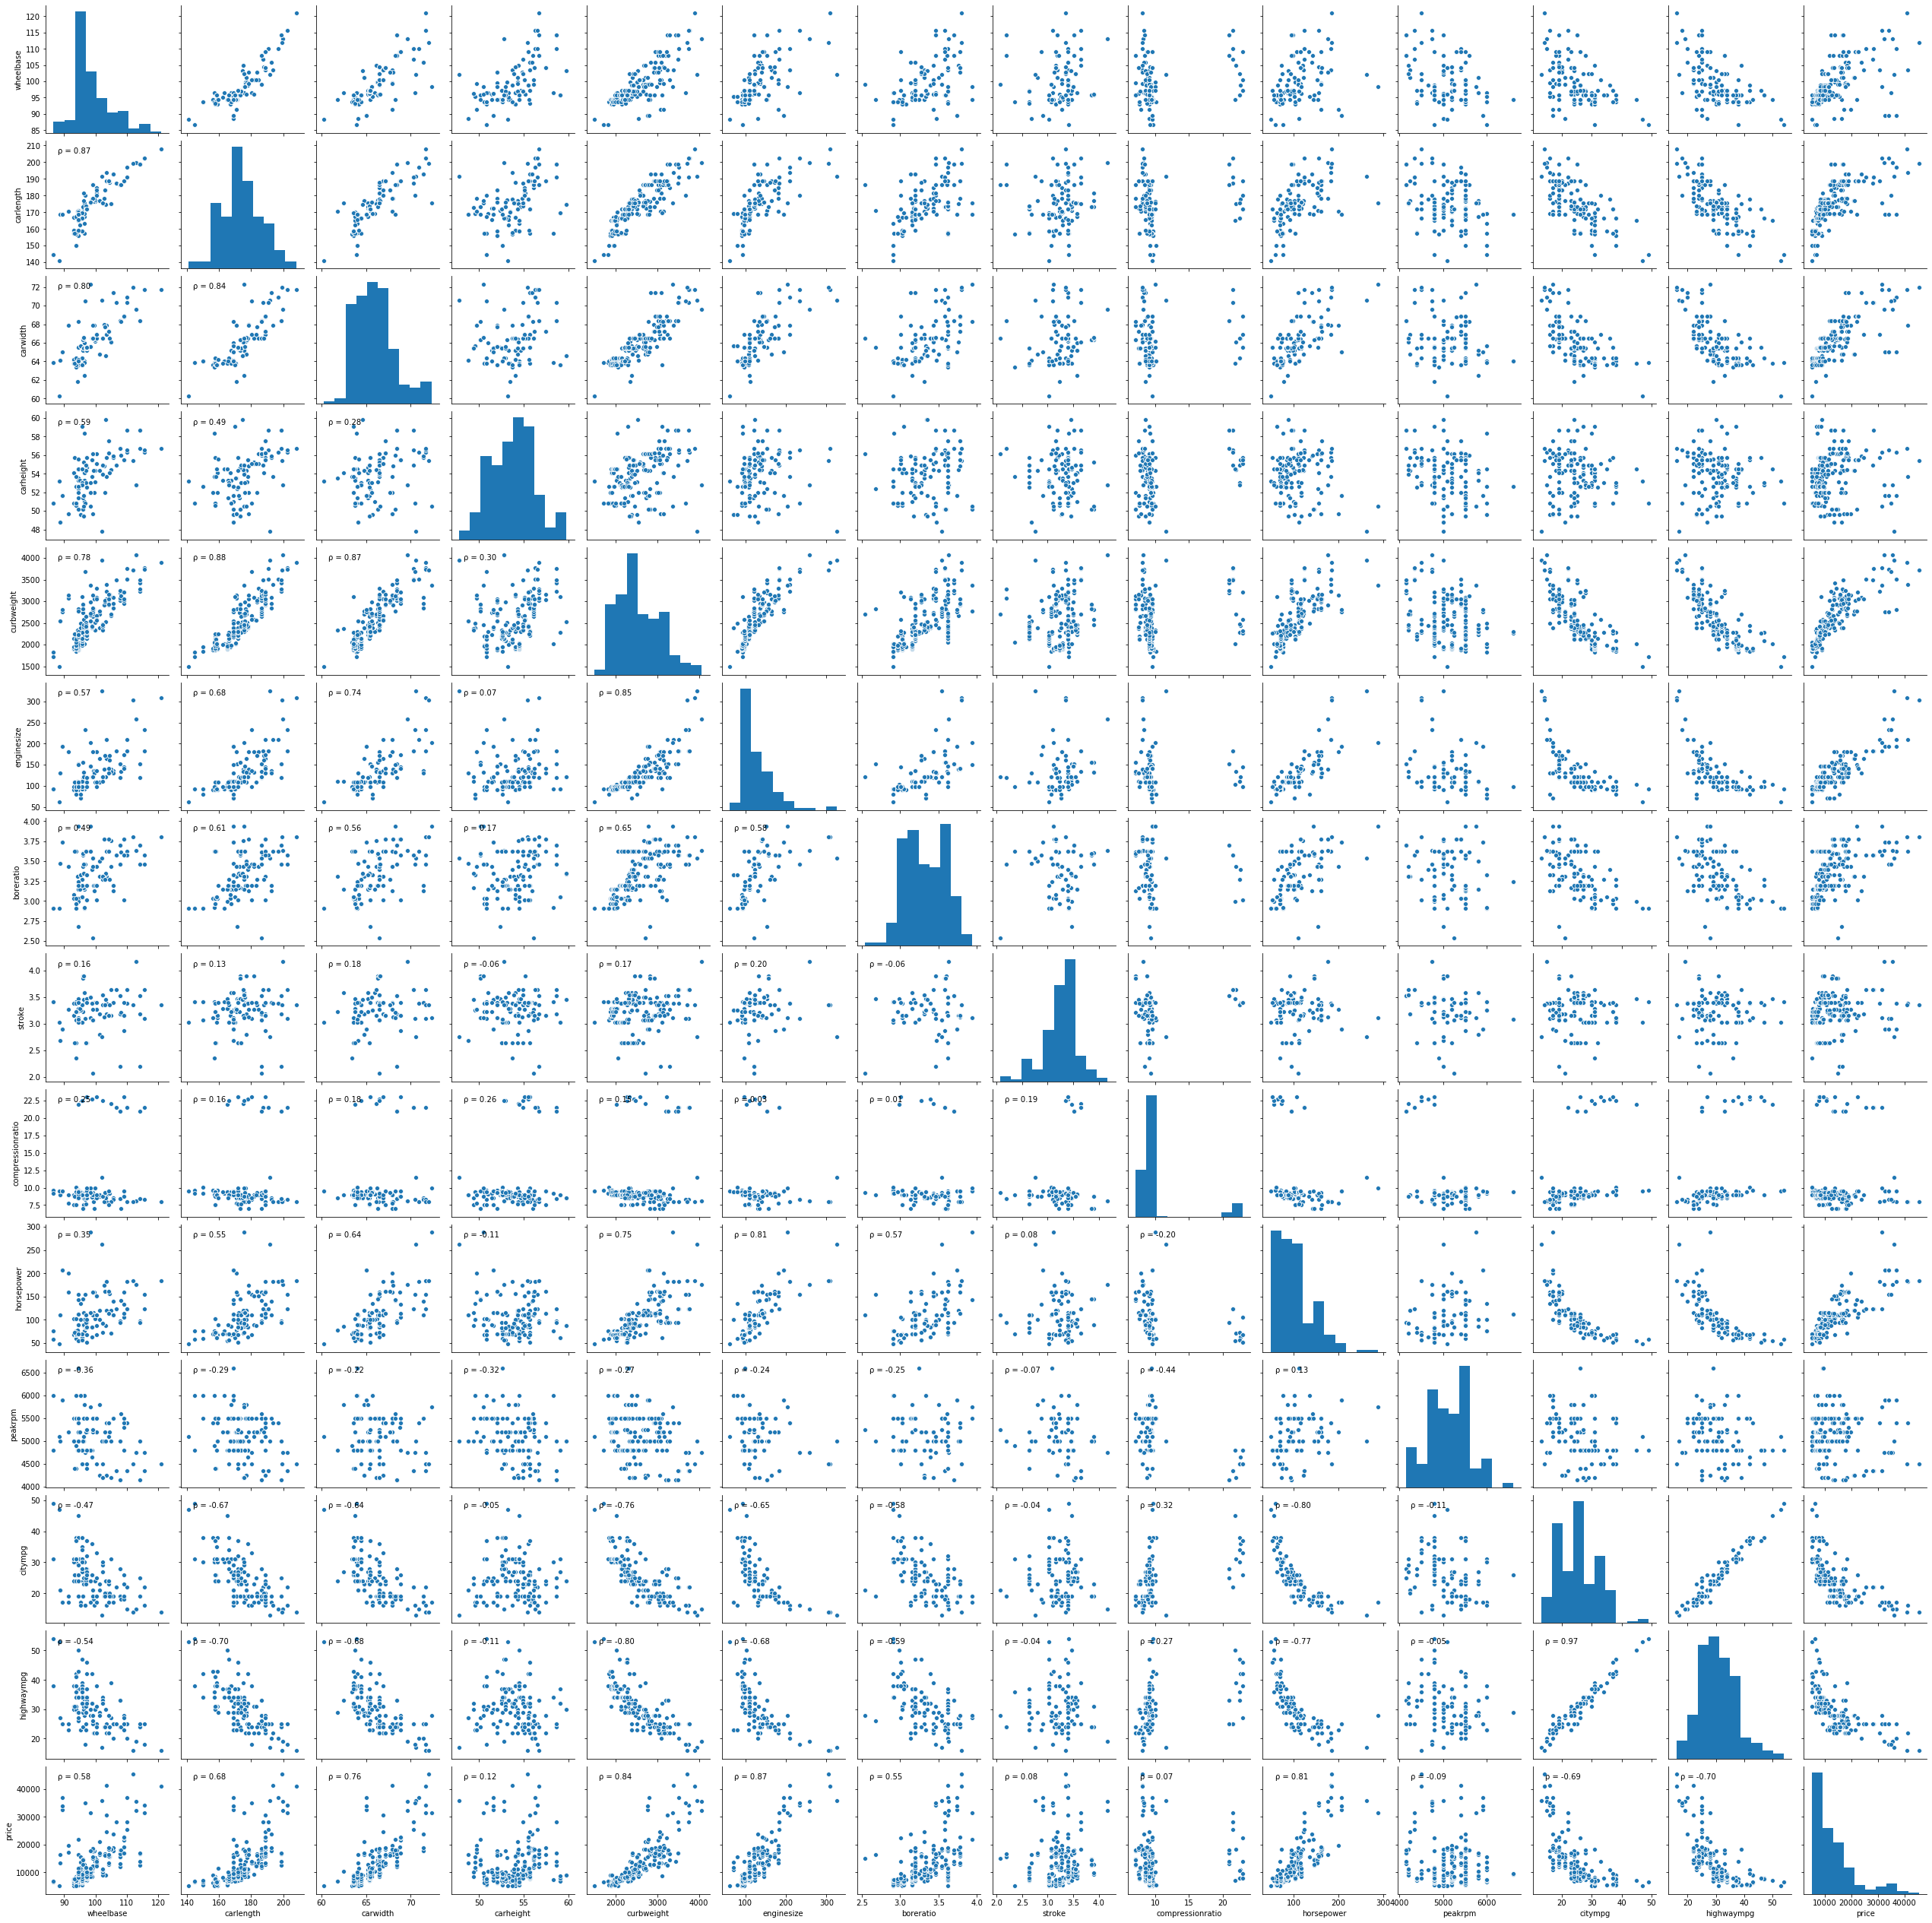

In [2]:
g = sns.pairplot(data_num)
g.map_lower(corrfunc)


g.savefig('scatter2.png', dpi=300)

# Findings from scatter plot:

<br>1) Wheelbase is highly corelated with car length. It is understandable as wheelbase is length between the axels. if needed we will use a new metric extra length = car length - wheelbase
<br>2) Wheelbase, car length, car width, curb weight are highly corelated. can we come up with better metrics?
<br>3) Car length (and other associated variables) and  engine size are non-linearly corelated
<br>4) Car length and horsepower are non-linearly corelated
<br>5) curb weight and horsepower strong correlation
<br>6) car length (and other associated variables) strongly correlated with citympg and highwaympg
<br>7) horsepower, citympg, highwaympg highly corelated (somewhat nonlinearly)
<br>8) Mild correlation
   <br>a) Engine Size - Bore Ration
    <br>b) bore ratio - mpg variables
    <br>c) car width horsepower
   <br>d) car length (and other associated variables) with other 
<br>9) stoke, car height, peak rpm have correlation with price (dependent) and other independent variables
<br>10) as expected, both mpg variable are strongly corelated. we should take harmonic mean to get to an average value.
<br>11) wheelbase has +ve correlation with price, but mild. may need some transformation as variable is right skewed
<br>12) car length has moderately strong nonlinear relation with price. same for car width
<br>13) mpgs have high nonlinear relation with y
<br>14) bore ratio has mild correlation with y but during univariate analysis we say two peaks. may by including categorical <br>variable it improves
<br>15) horse power has strong correlation with y. but with funnel may need transformation
<br>16) engine size strongly corelated with price


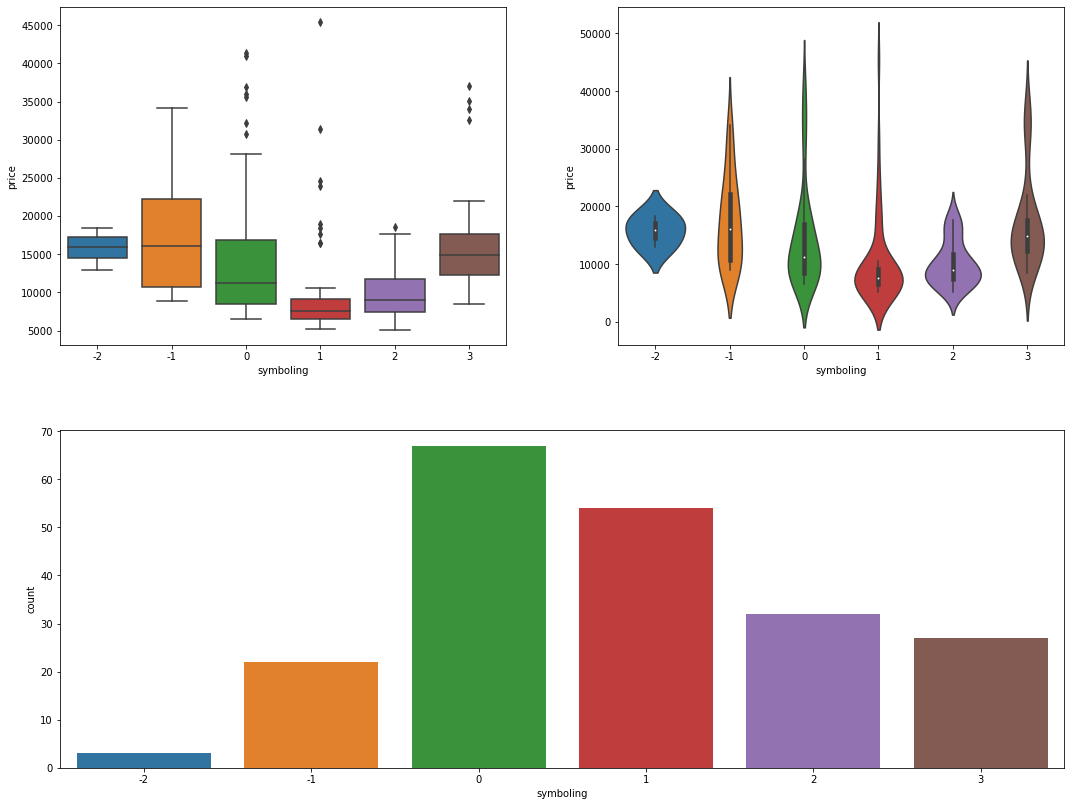

In [3]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='symboling', y='price',ax=ax0)
sns.violinplot(data = data, x='symboling', y='price',ax=ax1)
sns.countplot(data=data,x='symboling',ax=ax2)
plt.show()

Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.
-1,-2 are quite same
rest groups are different

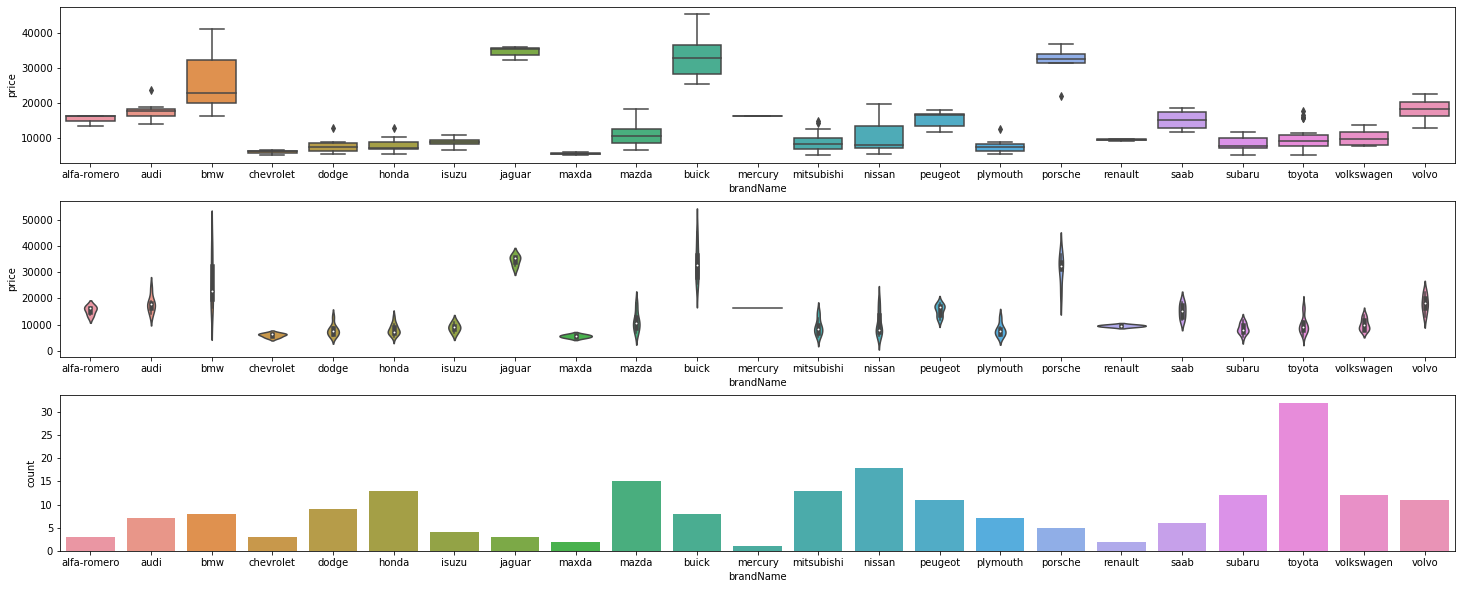

In [4]:
fig = plt.figure(figsize=(25, 10))
gs = grid.GridSpec(3, 1, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[2,:])
sns.boxplot(data = data, x='brandName', y='price',ax=ax0)
sns.violinplot(data = data, x='brandName', y='price',ax=ax1)
sns.countplot(data=data,x='brandName',ax=ax2)
plt.show()

some cars have high price. as they might be luxury brands

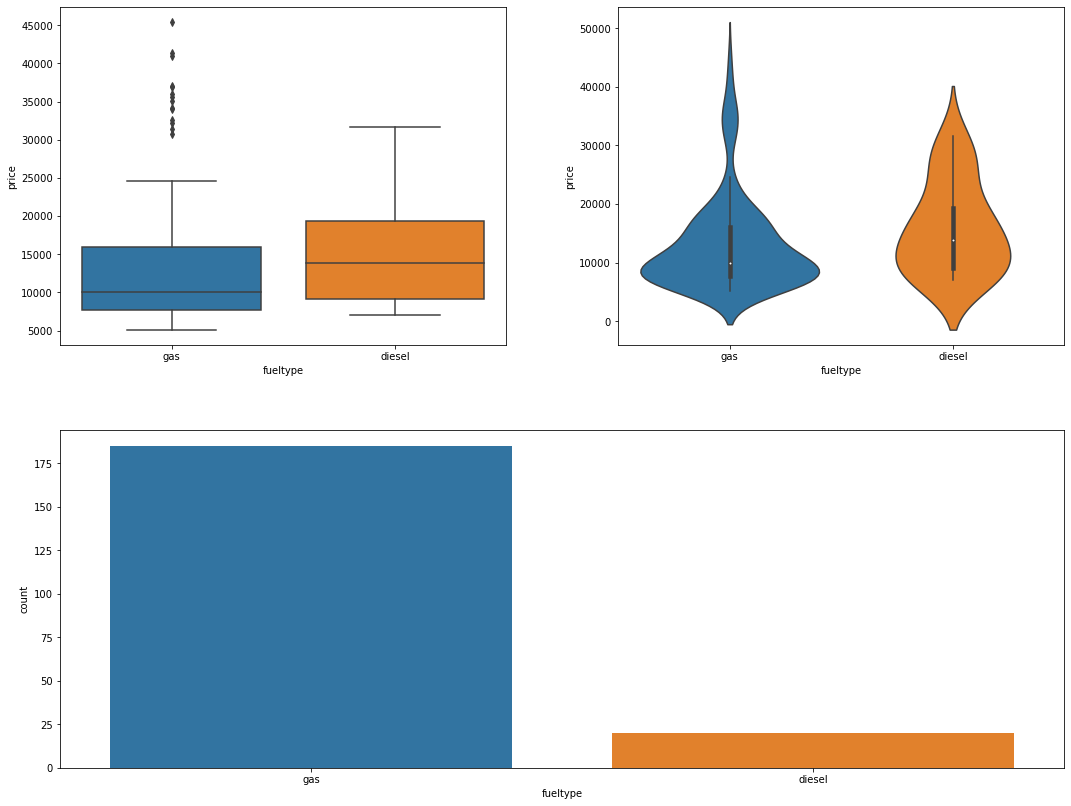

In [5]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='fueltype', y='price',ax=ax0)
sns.violinplot(data = data, x='fueltype', y='price',ax=ax1)
sns.countplot(data=data,x='fueltype',ax=ax2)
plt.show()

Gas and Diesel price level differs but not much. Diesels category dont have much cars.

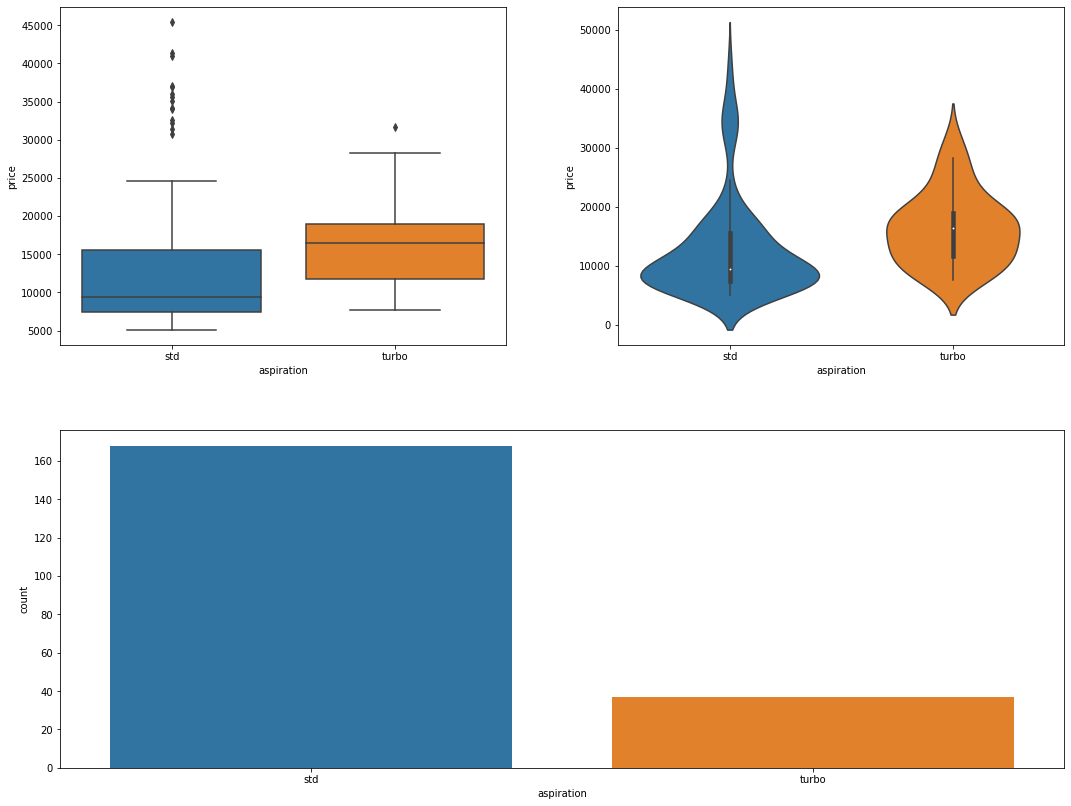

In [6]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='aspiration', y='price',ax=ax0)
sns.violinplot(data = data, x='aspiration', y='price',ax=ax1)
sns.countplot(data=data,x='aspiration',ax=ax2)
plt.show()

Diffenrece in  price for each category is there

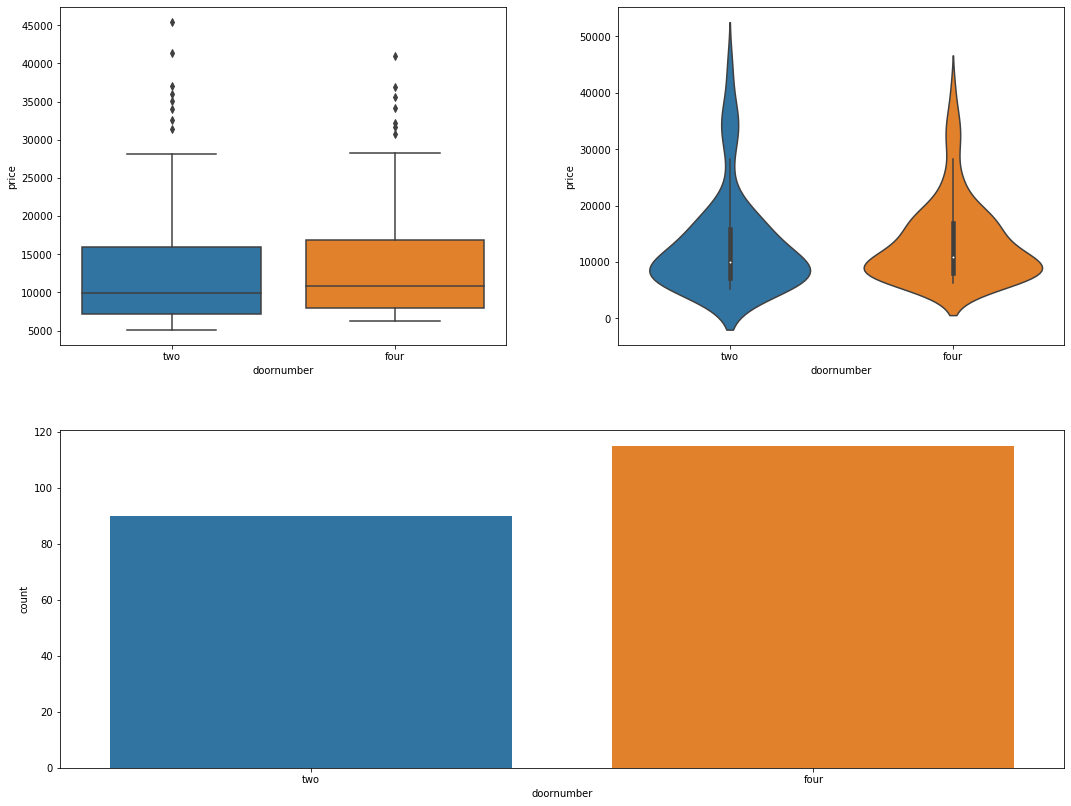

In [7]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='doornumber', y='price',ax=ax0)
sns.violinplot(data = data, x='doornumber', y='price',ax=ax1)
sns.countplot(data=data,x='doornumber',ax=ax2)
plt.show()


Doornumber: not much difference in price.

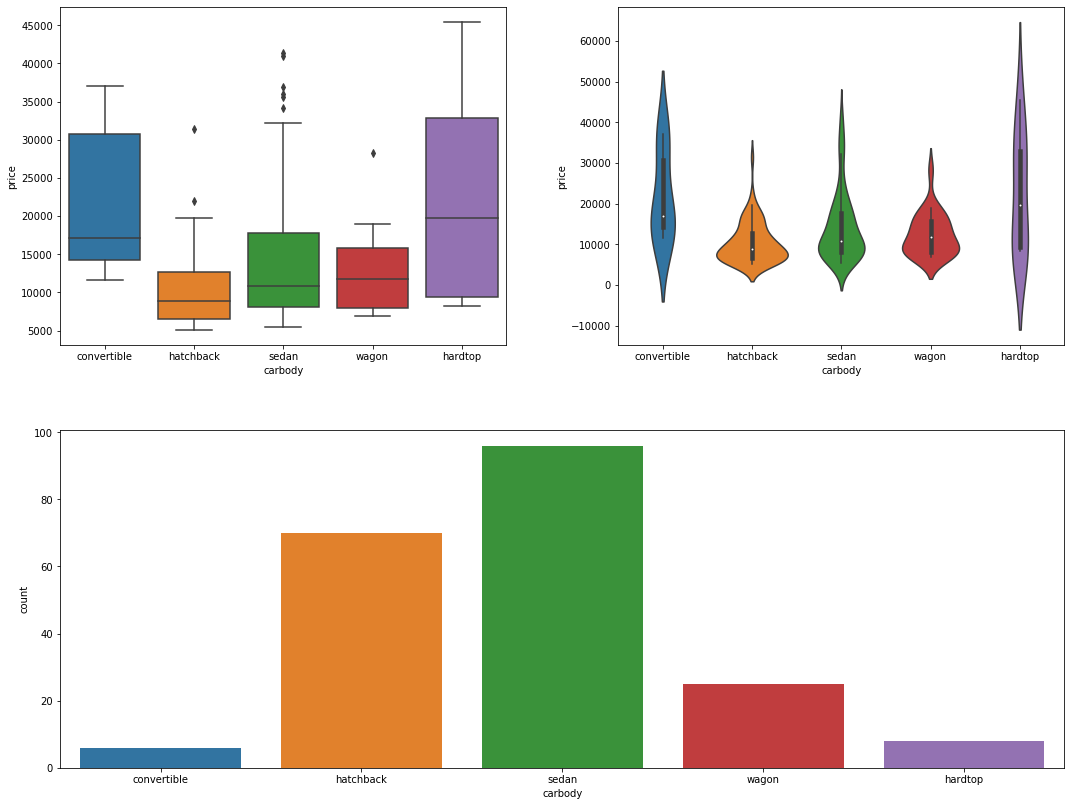

In [8]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='carbody', y='price',ax=ax0)
sns.violinplot(data = data, x='carbody', y='price',ax=ax1)
sns.countplot(data=data,x='carbody',ax=ax2)
plt.show()


Convertiable and hardtop price quite different from the rest

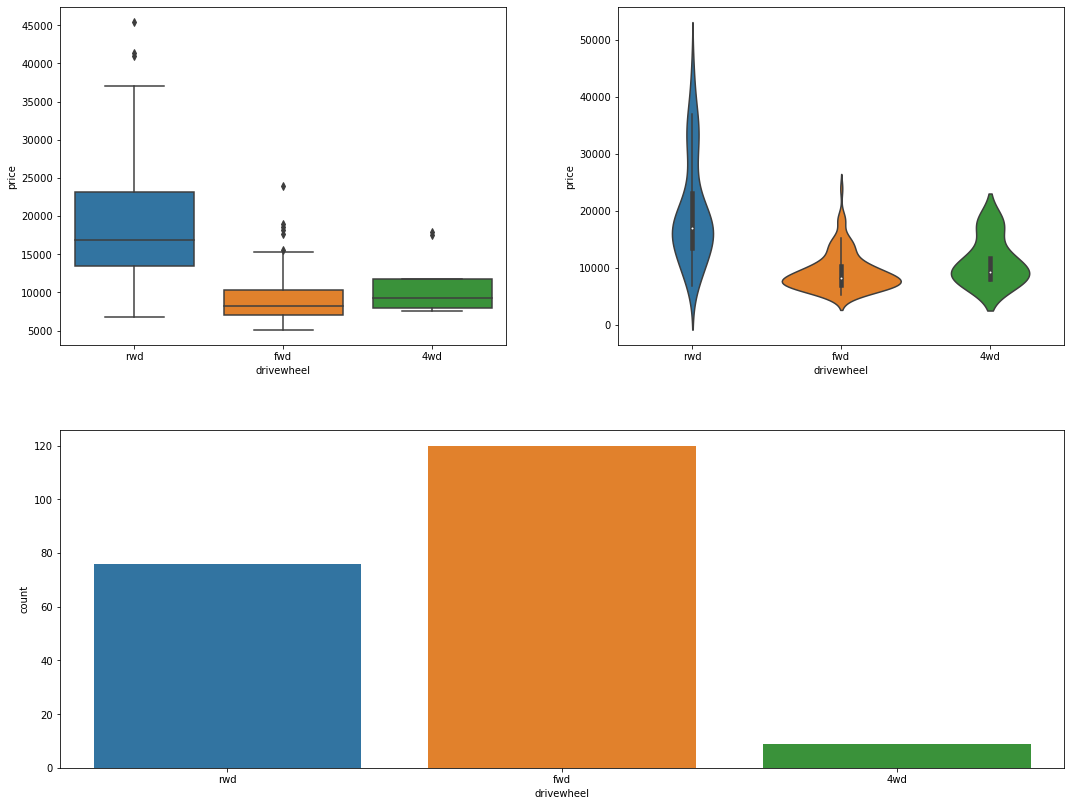

In [9]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='drivewheel', y='price',ax=ax0)
sns.violinplot(data = data, x='drivewheel', y='price',ax=ax1)
sns.countplot(data=data,x='drivewheel',ax=ax2)
plt.show()

rwd is very different from fwd and 4wd

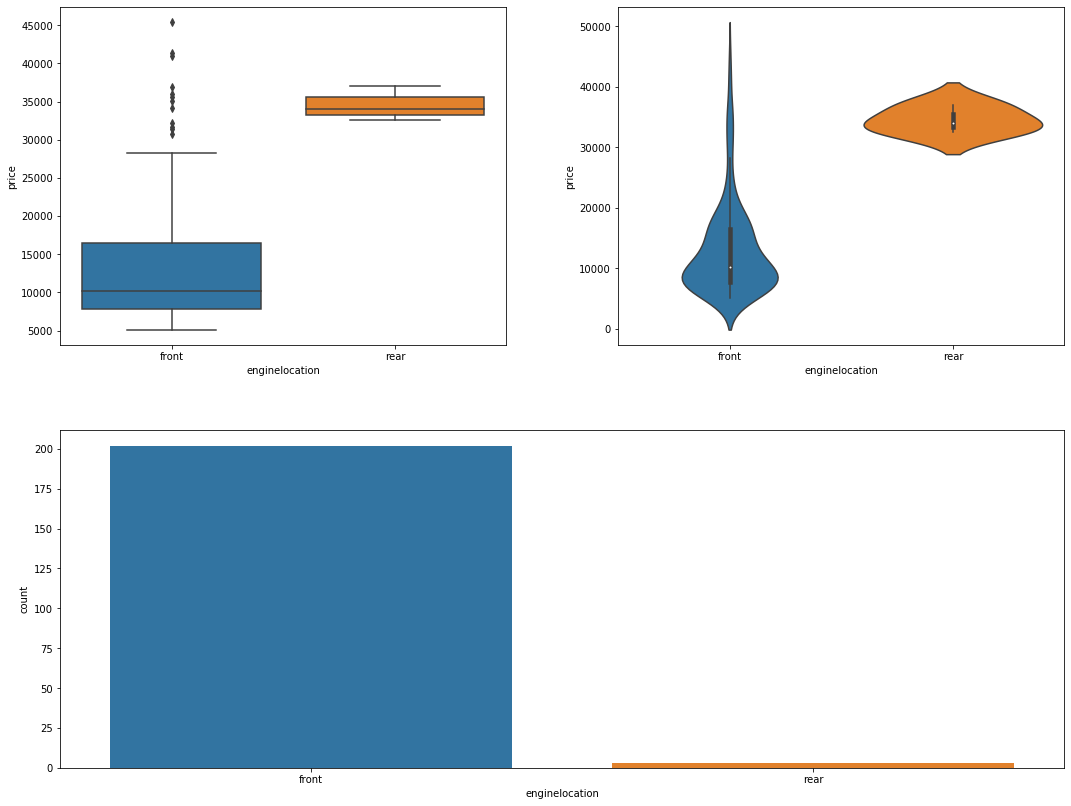

In [10]:


fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='enginelocation', y='price',ax=ax0)
sns.violinplot(data = data, x='enginelocation', y='price',ax=ax1)
sns.countplot(data=data,x='enginelocation',ax=ax2)
plt.show()

only 3 cars in rear that of porche. variable might not be that usable

In [11]:
datax=data[['drivewheel','enginelocation']]

datax['num1']=1

datax.pivot_table(values='num1',index='drivewheel', columns='enginelocation', aggfunc='sum')

C:\Users\prateek\Anaconda3\envs\R and Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


enginelocation,front,rear
drivewheel,,
4wd,9.0,NaN
fwd,120.0,NaN
rwd,73.0,3.0


In [12]:

datax=data[['brandName','enginelocation']]
datax['num1']=1

datax.pivot_table(values='num1',index='brandName', columns='enginelocation', aggfunc='sum').dropna()

C:\Users\prateek\Anaconda3\envs\R and Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


enginelocation,front,rear
brandName,,
porsche,2.0,3.0


In [13]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')

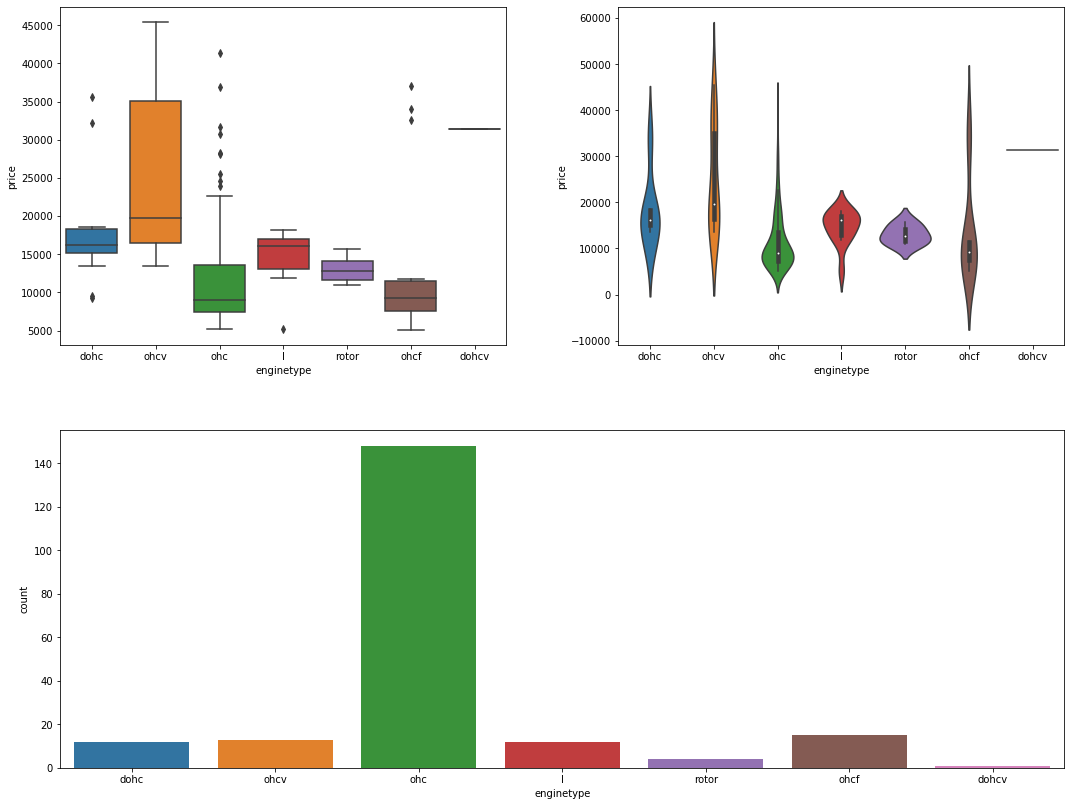

In [14]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='enginetype', y='price',ax=ax0)
sns.violinplot(data = data, x='enginetype', y='price',ax=ax1)
sns.countplot(data=data,x='enginetype',ax=ax2)
plt.show()

In [15]:
## majority of cars are under ohc. though good variation in price is there.

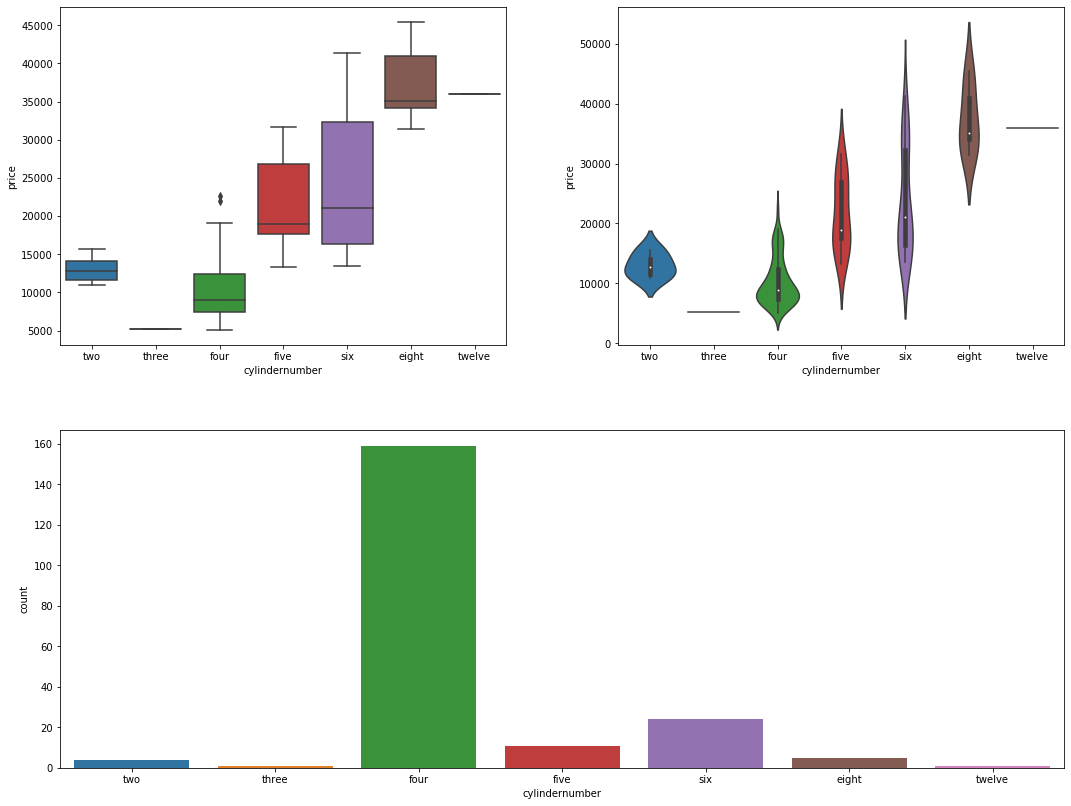

In [16]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='cylindernumber', y='price',ax=ax0,order=['two','three','four','five','six','eight','twelve'])
sns.violinplot(data = data, x='cylindernumber', y='price',ax=ax1,order=['two','three','four','five','six','eight','twelve'])
sns.countplot(data=data,x='cylindernumber',ax=ax2,order=['two','three','four','five','six','eight','twelve'])
plt.show()

majority of cars are under four cylinder. though good variation in price is there. five - six and eight - twelve looks similar

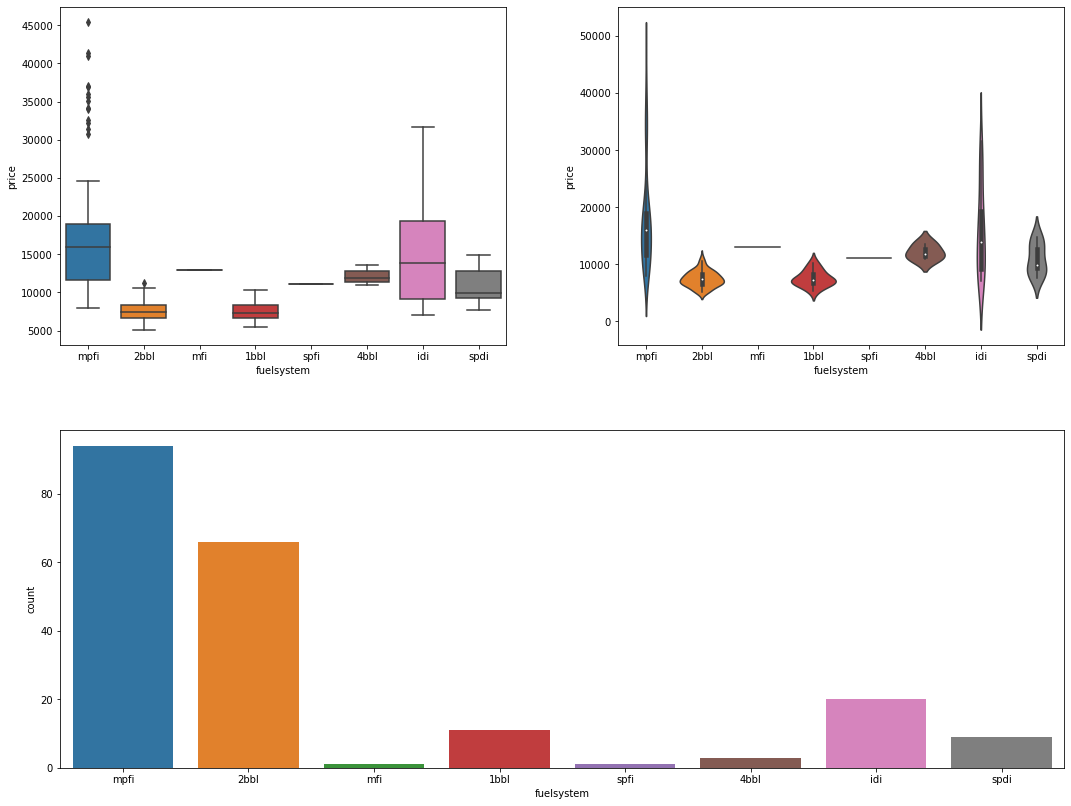

In [17]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='fuelsystem', y='price',ax=ax0,)
sns.violinplot(data = data, x='fuelsystem', y='price',ax=ax1)
sns.countplot(data=data,x='fuelsystem',ax=ax2)
plt.show()

good variation among the variables.

lets create two new variables scatter plot for diesel and petrol vehicles seperately. This will also give indication about coprssion ratio metrics

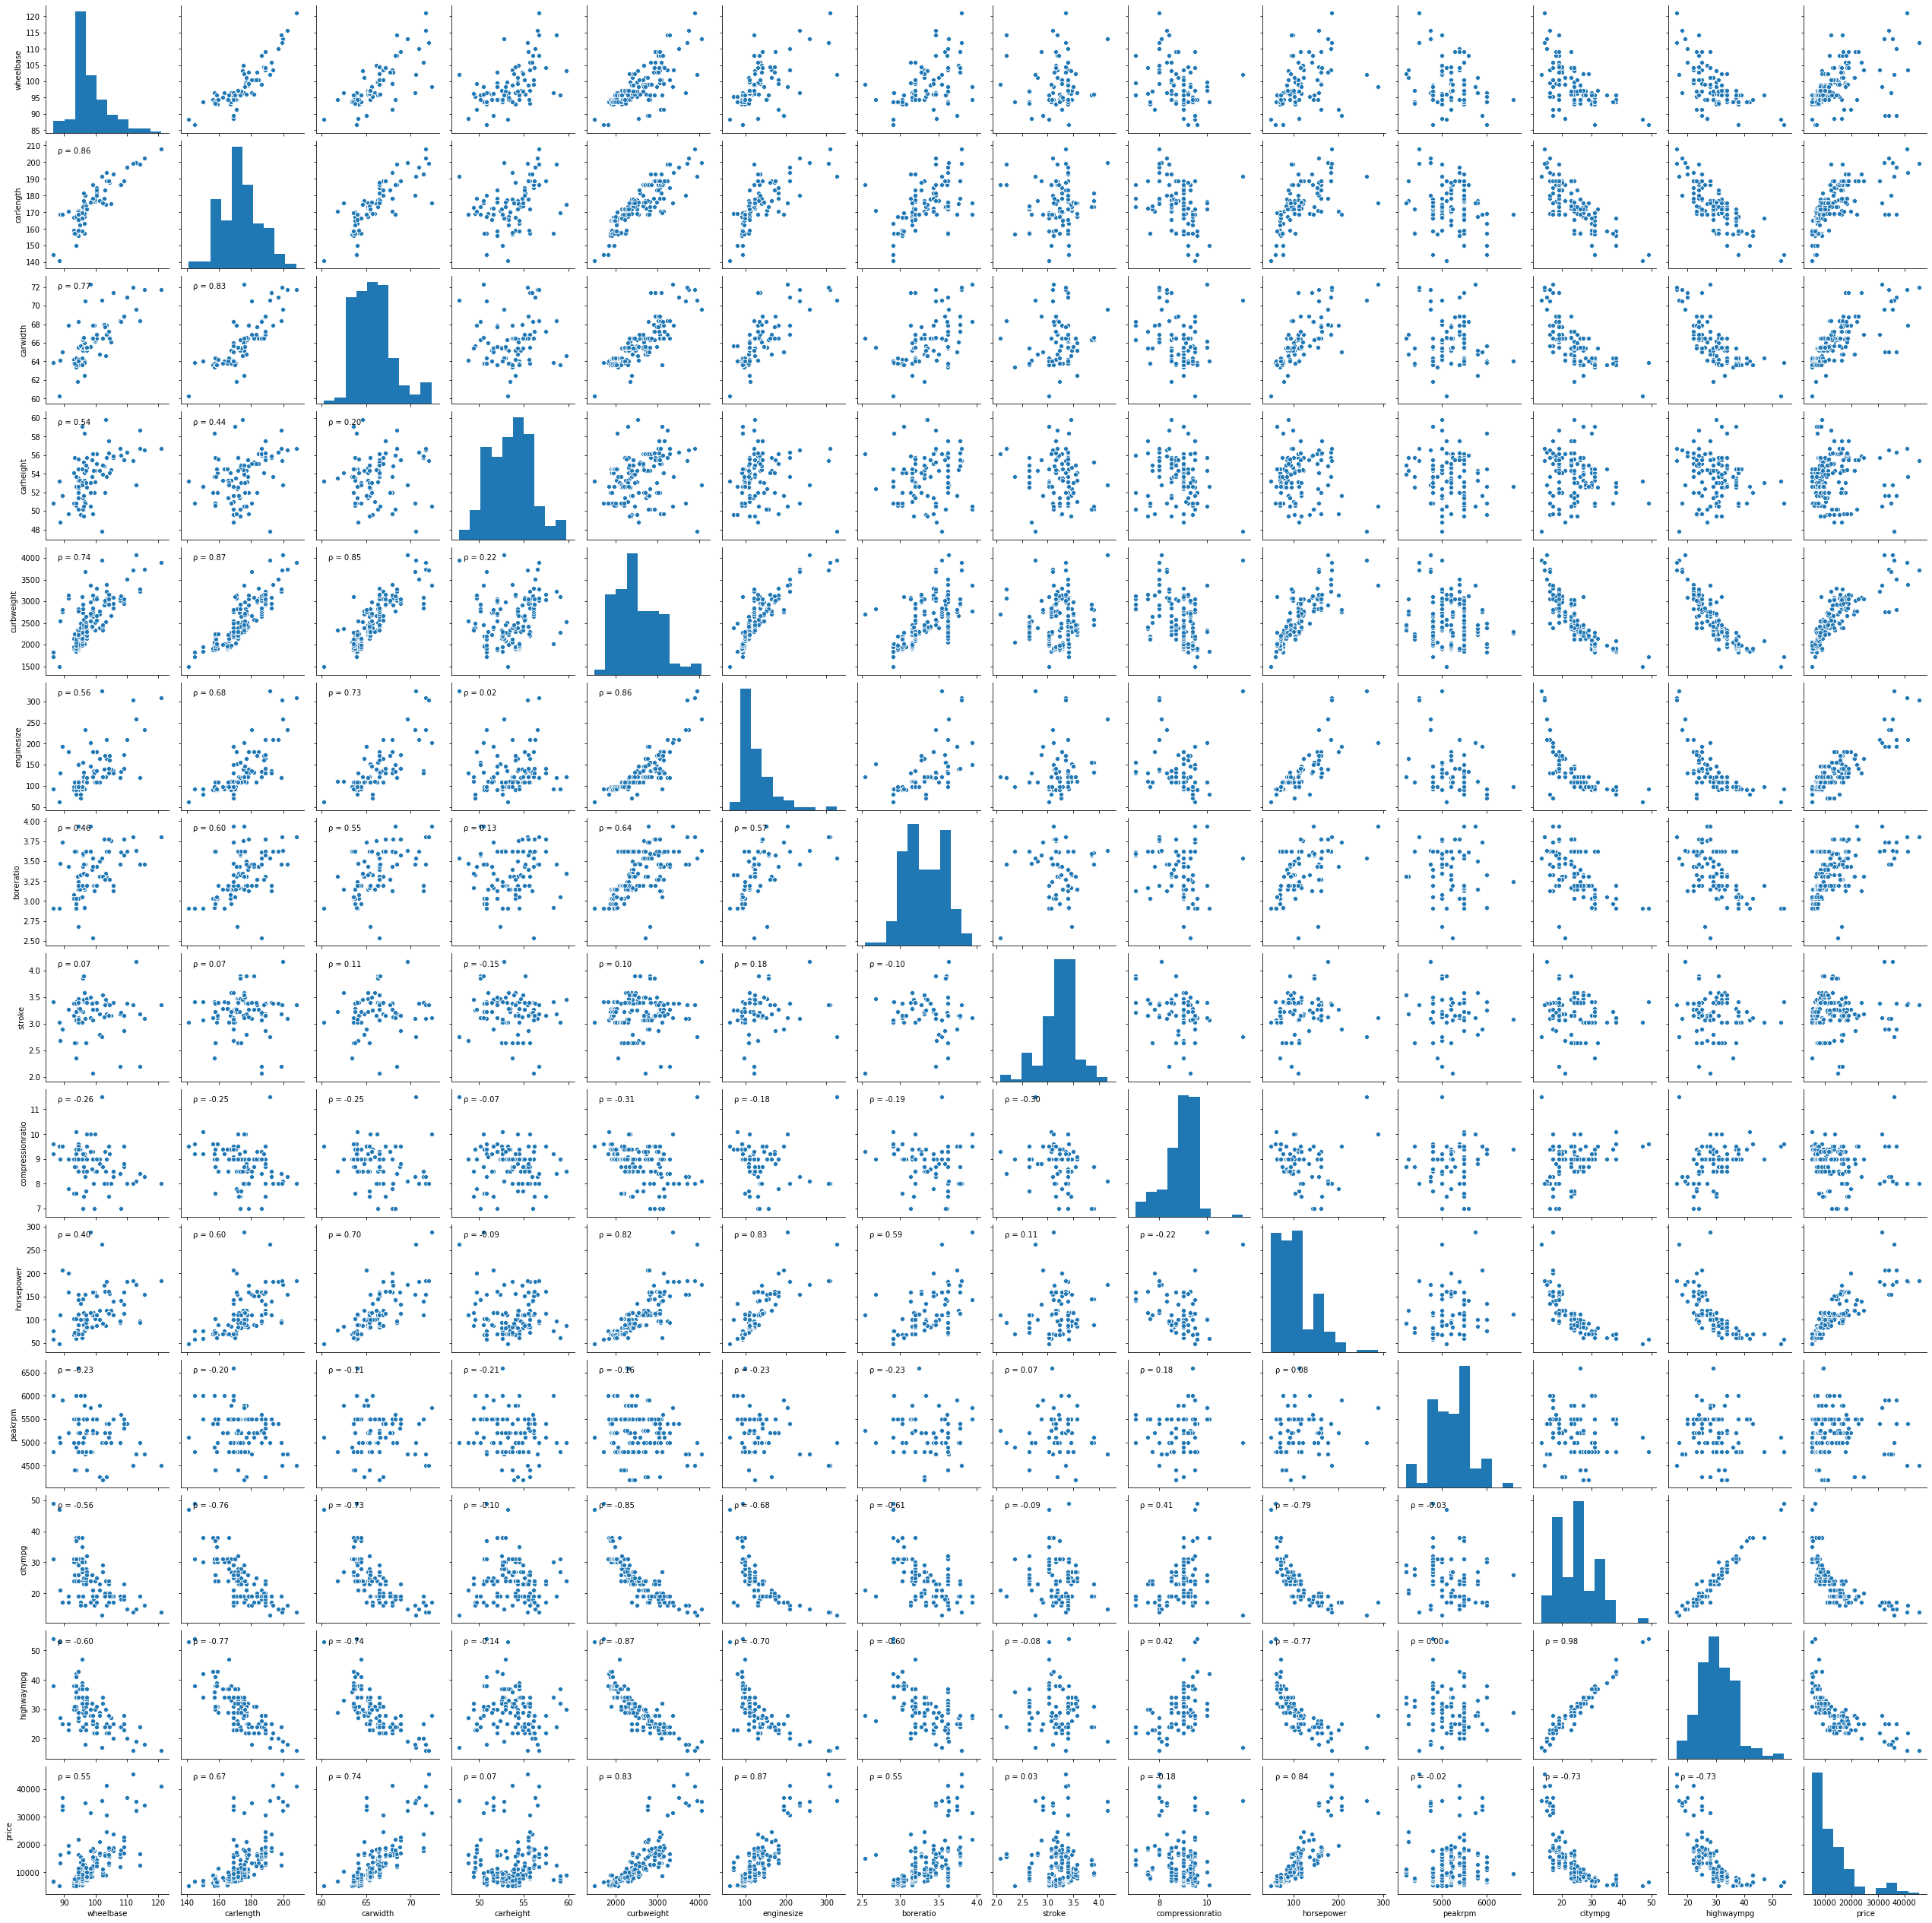

In [18]:
g = sns.pairplot(data_num[data_cat['fueltype']=='gas'])
g.map_lower(corrfunc)


g.savefig('scatter_gas.png', dpi=300)

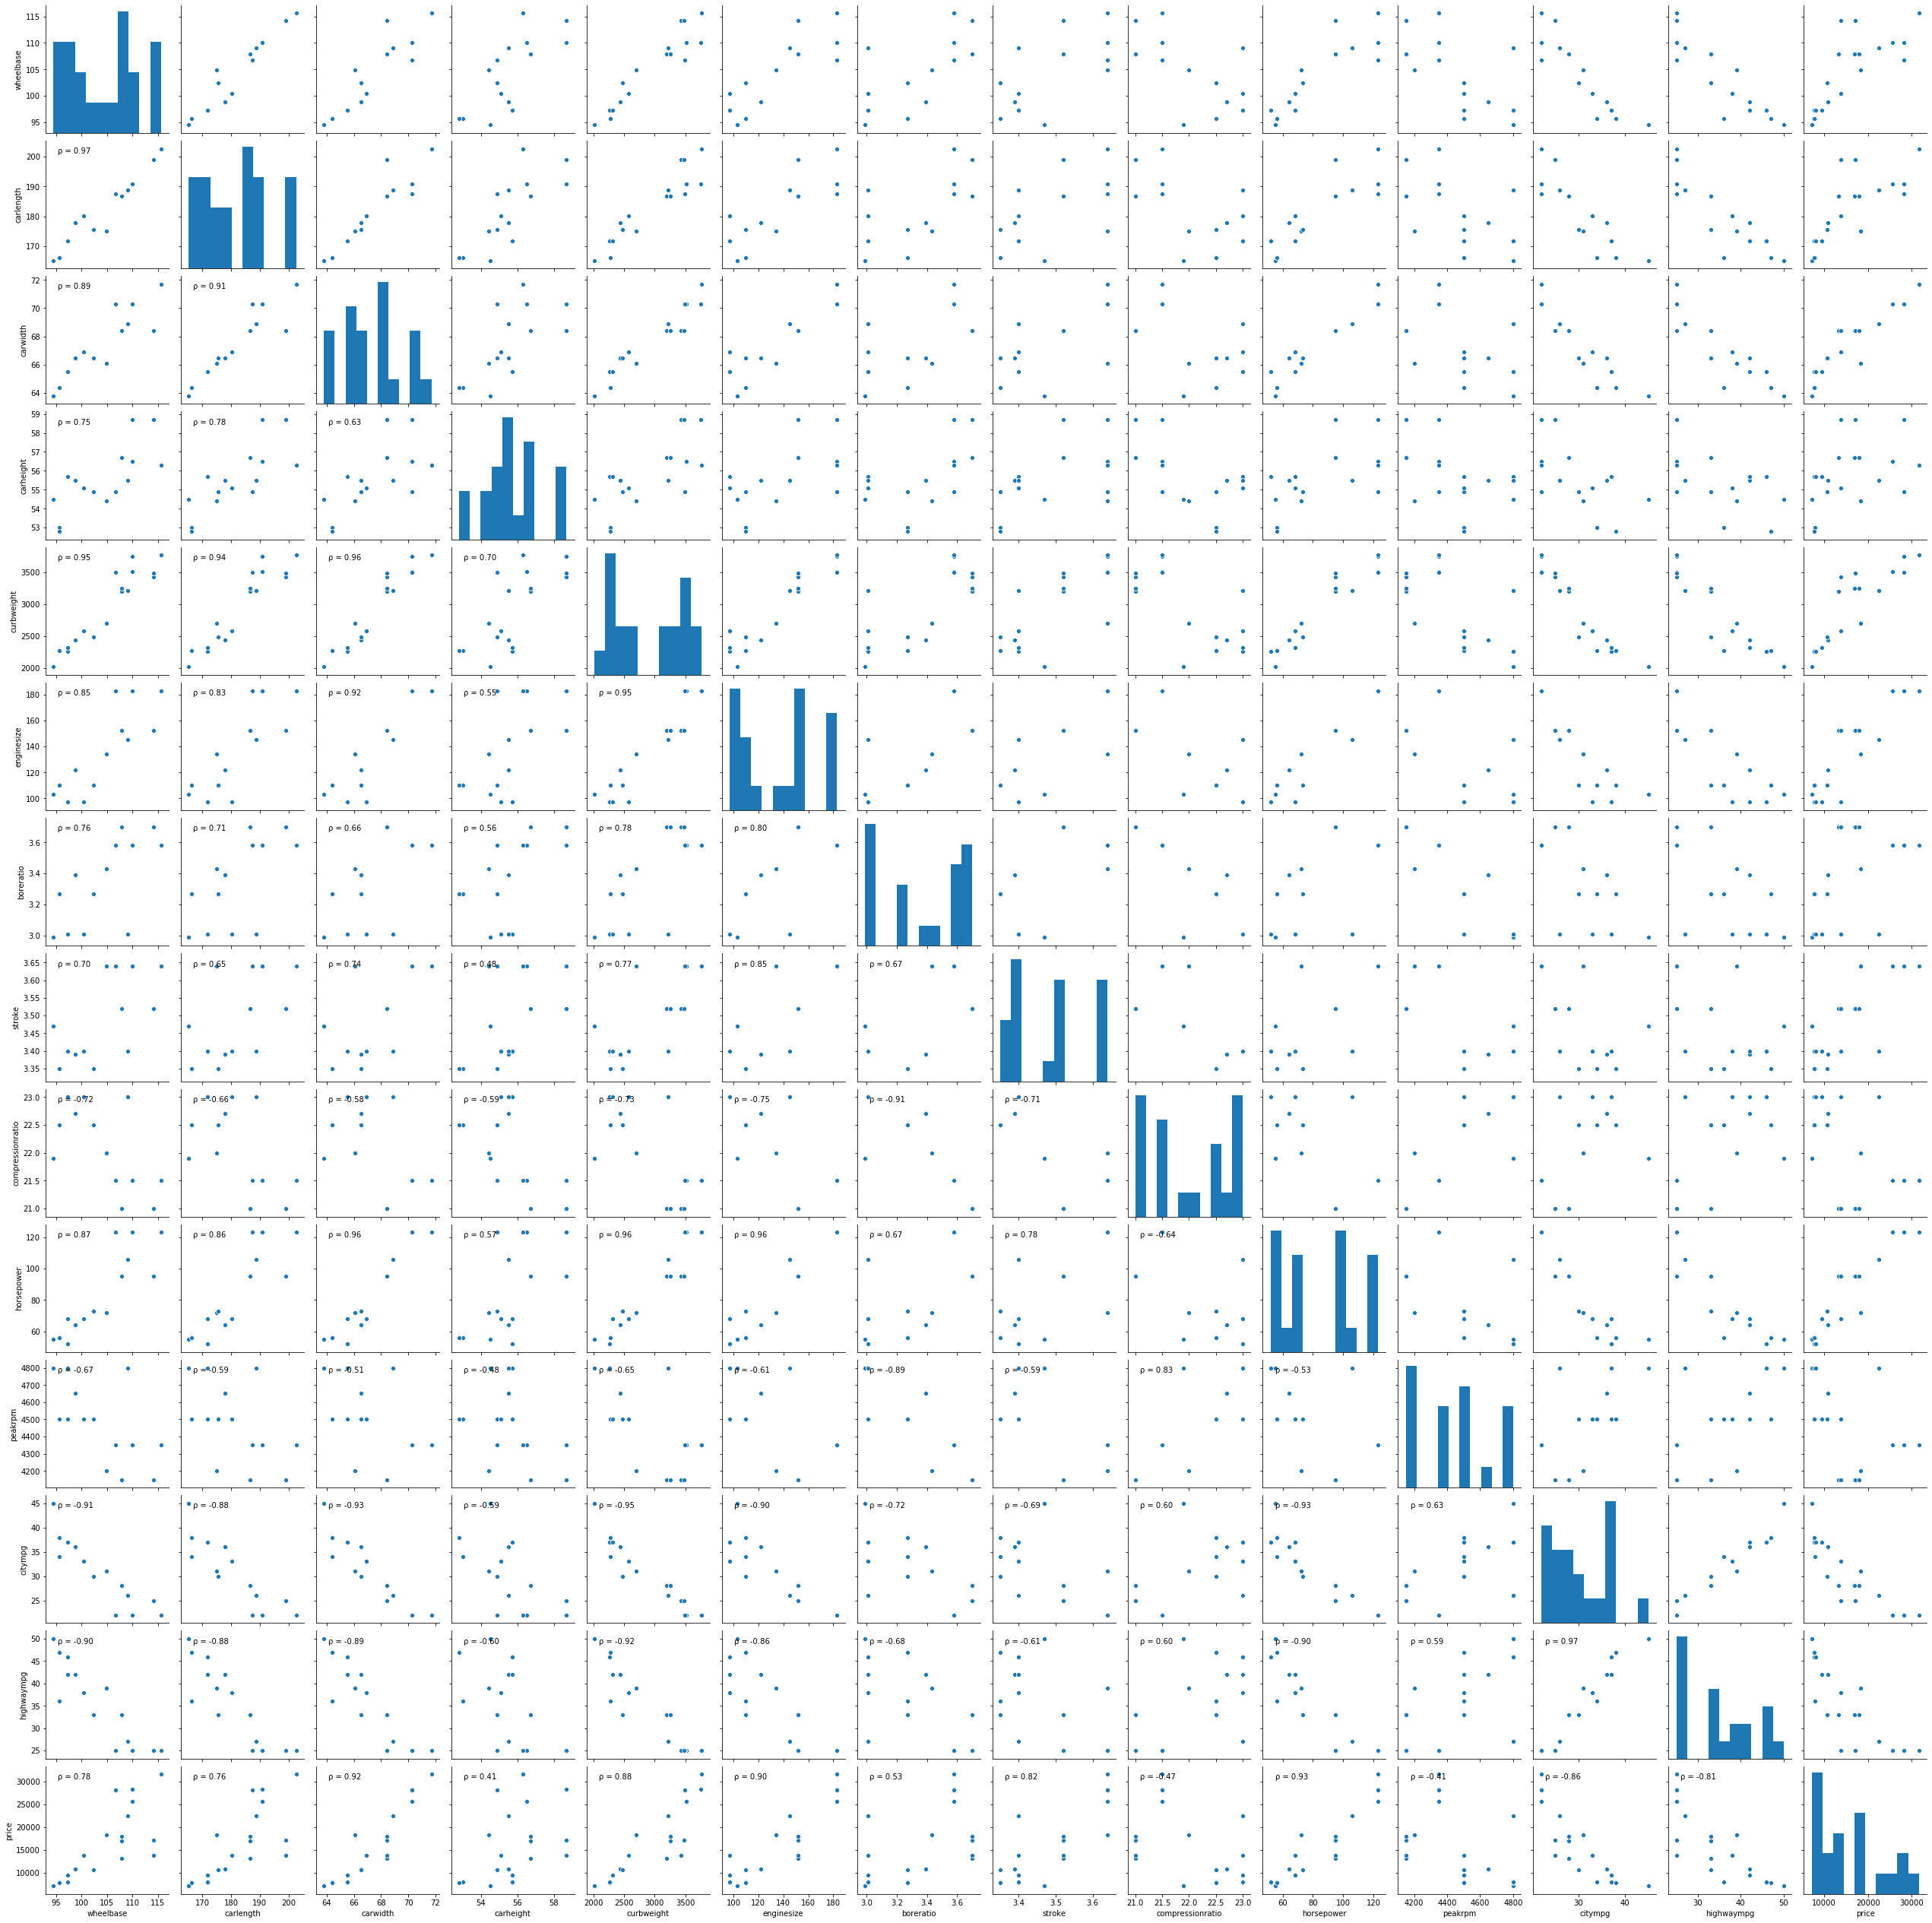

In [19]:
g = sns.pairplot(data_num[data_cat['fueltype']=='diesel'])
g.map_lower(corrfunc)


g.savefig('scatter_diesel.png', dpi=300)

### by analysis above scatterplots we can say the comression ration is weakly corelated with y. we might need an interaction varaible between comression ratio and fuel type

In [20]:
data1 = pd.concat([data_cat,data_num],axis=1)

In [21]:
data1.shape

(205, 26)

In [22]:
data1.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [23]:
data_final =data1[['symboling','fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']]

In [24]:
data_final.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
data_final.iloc[:,24:25]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [25]:
data_final.to_csv('Data/data_cleaned.csv')

In [26]:
from sklearn.model_selection import train_test_split


In [31]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_final, test_size=0.20)

In [45]:
train.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))

symboling          6
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     6
fuelsystem         8
brandName         23
dtype: int64

In [47]:
data_final.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))==train.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))

symboling          True
fueltype           True
aspiration         True
doornumber         True
carbody            True
drivewheel         True
enginelocation     True
enginetype         True
cylindernumber    False
fuelsystem         True
brandName          True
dtype: bool

## We need to have all sample in training there cylinder number is a problem. lets check which cylinder number is missing and we will puth that in training and remove test

In [48]:
train['cylindernumber'].unique()

array(['four', 'six', 'five', 'two', 'eight', 'three'], dtype=object)

In [49]:
#twelve is missing

In [53]:
train = pd.concat([train,test[test['cylindernumber']=='twelve']],axis=0)

In [56]:
test = test[test['cylindernumber']!='twelve']

In [57]:
train.to_csv('Data/data_train.csv')
test.to_csv('Data/data_test.csv')